<a href="https://colab.research.google.com/github/Mansufa/FIAP/blob/main/PLN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

from sklearn.linear_model import LogisticRegression

avaliacoes = pd.read_csv("b2w.csv")

In [ ]:
avaliacoes.head()

original_index                                        review_text  \
0           11955  Bem macio e felpudo...recomendo.  Preço imbatí...   
1           35478  Produto excepcional!  recomendo!!! inovador e ...   
2          122760  recebi o produto antes do prazo mas veio com d...   
3           17114  Bom custo beneficio. Adequado para pessoas que...   
4           19112  Além de higiênico tem o tamanho ideal. Só falt...   

                               review_text_processed  \
0  bem macio e felpudo...recomendo.  preco imbati...   
1  produto excepcional!  recomendo!!! inovador e ...   
2  recebi o produto antes do prazo mas veio com d...   
3  bom custo beneficio. adequado para pessoas que...   
4  alem de higienico tem o tamanho ideal. so falt...   

                               review_text_tokenized  polarity  rating  \
0  ['bem', 'macio', 'felpudo', 'recomendo', 'prec...       1.0     4.0   
1  ['produto', 'excepcional', 'recomendo', 'inova...       1.0     5.0   
2  ['recebi', 'produto', 'antes', 'do', 'prazo', ...       0.0     1.0   
3  ['bom', 'custo', 'beneficio', 'adequado', 'par...       1.0     5.0   
4  ['alem', 'de', 'higienico', 'tem', 'tamanho', ...       NaN     3.0   

   kfold_polarity  kfold_rating  
0             1.0           1.0  
1             1.0           1.0  
2             1.0           1.0  
3             1.0           1.0  
4            -1.0           1.0

In [ ]:
avaliacoes = avaliacoes.drop(["original_index", "review_text_processed", "review_text_tokenized", "rating", "kfold_polarity","kfold_rating"], axis = 1)

In [ ]:
avaliacoes.head()

review_text  polarity
0  Bem macio e felpudo...recomendo.  Preço imbatí...       1.0
1  Produto excepcional!  recomendo!!! inovador e ...       1.0
2  recebi o produto antes do prazo mas veio com d...       0.0
3  Bom custo beneficio. Adequado para pessoas que...       1.0
4  Além de higiênico tem o tamanho ideal. Só falt...       NaN

In [ ]:
avaliacoes.dropna(inplace=True, axis = 0)

In [ ]:
avaliacoes

review_text  polarity
0      Bem macio e felpudo...recomendo.  Preço imbatí...       1.0
1      Produto excepcional!  recomendo!!! inovador e ...       1.0
2      recebi o produto antes do prazo mas veio com d...       0.0
3      Bom custo beneficio. Adequado para pessoas que...       1.0
5      ótmo produto atendeu as expectativas, a entreg...       1.0
...                                                  ...       ...
37385  não recebemos este livro ainda, nosso filho es...       0.0
37386  A impressora atendeu minhas expectativas. Impr...       1.0
37388  Comprei em 29/01/2018 e na hora da compra esta...       0.0
37389  Balança atendeu bem as expectativas. Compacta ...       1.0
37390  Muito satisfeita com a qualidade do produto, a...       1.0

[32710 rows x 2 columns]

In [ ]:
avaliacoes.polarity.value_counts()

polarity
1.0    22571
0.0    10139
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

treino, test, classe_treino, classe_teste = train_test_split(avaliacoes.review_text, avaliacoes.polarity, test_size=0.2, random_state=71)


In [ ]:
classe_teste

25423    0.0
4219     1.0
16356    0.0
24833    1.0
28707    1.0
        ... 
28014    1.0
1665     1.0
22406    1.0
34000    1.0
37205    1.0
Name: polarity, Length: 6542, dtype: float64

In [ ]:
#from sklearn.linear_model import LogisticRegression

#regressao_logistica = LogisticRegression()

#regressao_logistica.fit(treino,classe_treino)
#acuracia = regressao_logistica.score(test,classe_teste)
#acuracia

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

texto = ["Este produto é muito bom", "Estr produto é muito ruim"]
vetorizar = CountVectorizer()
bag_of_words = vetorizar.fit_transform(texto)

In [ ]:
bag_of_words

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 8 stored elements and shape (2, 6)>

In [ ]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns = vetorizar.get_feature_names_out())

In [ ]:
matriz_esparsa

bom  este  estr  muito  produto  ruim
0    1     1     0      1        1     0
1    0     0     1      1        1     1

In [ ]:
vetorizar = CountVectorizer()
bag_of_words = vetorizar.fit_transform(avaliacoes.review_text)
print(bag_of_words.shape)

(32710, 26487)


In [ ]:
vetorizar = CountVectorizer(max_features=100)
bag_of_words = vetorizar.fit_transform(avaliacoes.review_text)
print(bag_of_words.shape)

(32710, 100)


In [ ]:
treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, avaliacoes.polarity, stratify=avaliacoes.polarity, random_state=71)

In [ ]:
regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino,classe_treino)
acuracia = regressao_logistica.score(teste,classe_teste)
acuracia

0.8831010026901442

In [ ]:
def treinar_modelo(dados, coluna_texto, coluna_sentimento):
  vetorizar = CountVectorizer()
  bag_of_words = vetorizar.fit_transform(avaliacoes[coluna_texto])

  treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, avaliacoes[coluna_sentimento], stratify=avaliacoes[coluna_sentimento], random_state=71)

  regressao_logistica = LogisticRegression()
  regressao_logistica.fit(treino,classe_treino)
  return regressao_logistica.score(teste,classe_teste)

In [ ]:
print(treinar_modelo(avaliacoes, "review_text", "polarity"))

0.9326241134751773


# Word Cloud

Estamos fazendo uma Word Cloud

In [ ]:
from wordcloud import WordCloud

todas_avaliacoes = [texto for texto in avaliacoes.review_text]
todas_palavras = " ".join(todas_avaliacoes)

In [ ]:
len(todas_avaliacoes)

32710

In [ ]:
len(todas_palavras)

4654603

In [ ]:
nuvem_palavras = WordCloud().generate(todas_palavras)

In [ ]:
nuvem_palavras

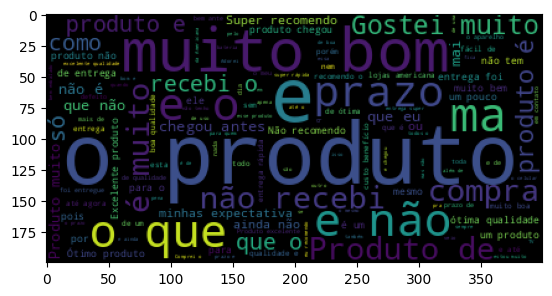

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(nuvem_palavras)

In [ ]:
nuvem_palavras = WordCloud(width=800, height= 500, max_font_size=110).generate(todas_palavras)

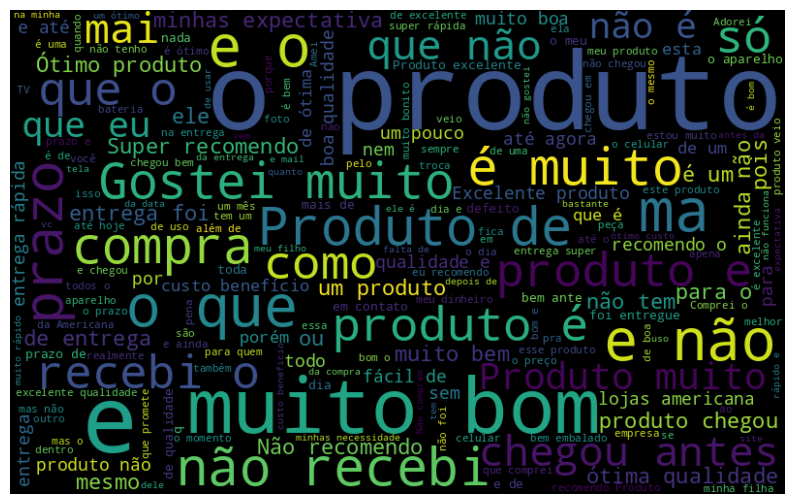

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.imshow(nuvem_palavras, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
def word_cloud_neg(dados, coluna_texto):
  texto_negativo = dados.query("polarity == 0")
  todas_avaliacoes = [texto for texto in texto_negativo.review_text]
  todas_palavras = " ".join(todas_avaliacoes)
  nuvem_palavras = WordCloud(width=800, height= 500, max_font_size=110, collocations = False).generate(todas_palavras)

  plt.figure(figsize=(10, 7))
  plt.imshow(nuvem_palavras, interpolation="bilinear")
  plt.axis("off")
  plt.show()

In [ ]:
def word_cloud_pos(dados, coluna_texto):
  texto_negativo = dados.query("polarity == 1")
  todas_avaliacoes = [texto for texto in texto_negativo.review_text]
  todas_palavras = " ".join(todas_avaliacoes)
  nuvem_palavras = WordCloud(width=800, height= 500, max_font_size=110, collocations = False).generate(todas_palavras)

  plt.figure(figsize=(10, 7))
  plt.imshow(nuvem_palavras, interpolation="bilinear")
  plt.axis("off")
  plt.show()

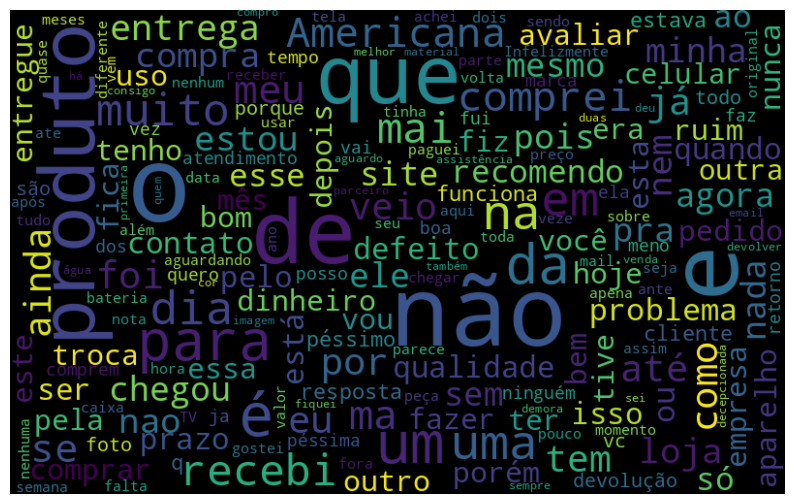

In [ ]:
word_cloud_neg(avaliacoes, "review_text")

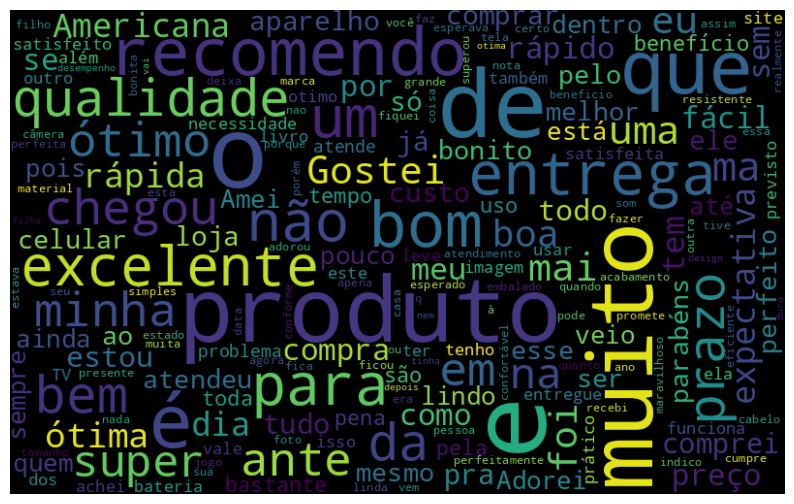

In [ ]:
word_cloud_pos(avaliacoes, "review_text")

# NLTK

In [ ]:
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [ ]:
corpus = ["Muito bom esse produto", "Muito ruim esse produto"]
frequencia = nltk.FreqDist(corpus)
frequencia

FreqDist({'Muito bom esse produto': 1, 'Muito ruim esse produto': 1})

In [ ]:
from nltk import tokenize

frase = "Muito bom esse produto"

token_por_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_por_espaco.tokenize(frase)
token_frase

['Muito', 'bom', 'esse', 'produto']

In [ ]:
token_por_espaco = tokenize.WordPunctTokenizer()
token_dataset = token_por_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_dataset)

In [ ]:
frequencia

FreqDist({'.': 47166, ',': 44954, 'e': 25754, 'o': 21501, 'de': 21313, 'a': 18823, 'que': 15294, 'produto': 14347, 'não': 12844, 'muito': 11013, ...})

In [ ]:
dataframe_frequencia = pd.DataFrame({"Palavrea": list(frequencia.keys()), "Frequencia": list(frequencia.values())})

In [ ]:
dataframe_frequencia.head()

Palavrea  Frequencia
0      Bem         123
1    macio         114
2        e       25754
3  felpudo           7
4      ...        2914

In [ ]:
dataframe_frequencia.nlargest(columns="Frequencia", n=10)

Palavrea  Frequencia
6         .       47166
79        ,       44954
2         e       25754
25        o       21501
21       de       21313
44        a       18823
55      que       15294
26  produto       14347
38      não       12844
48    muito       11013

[Text(0, 0.5, 'Contagem')]

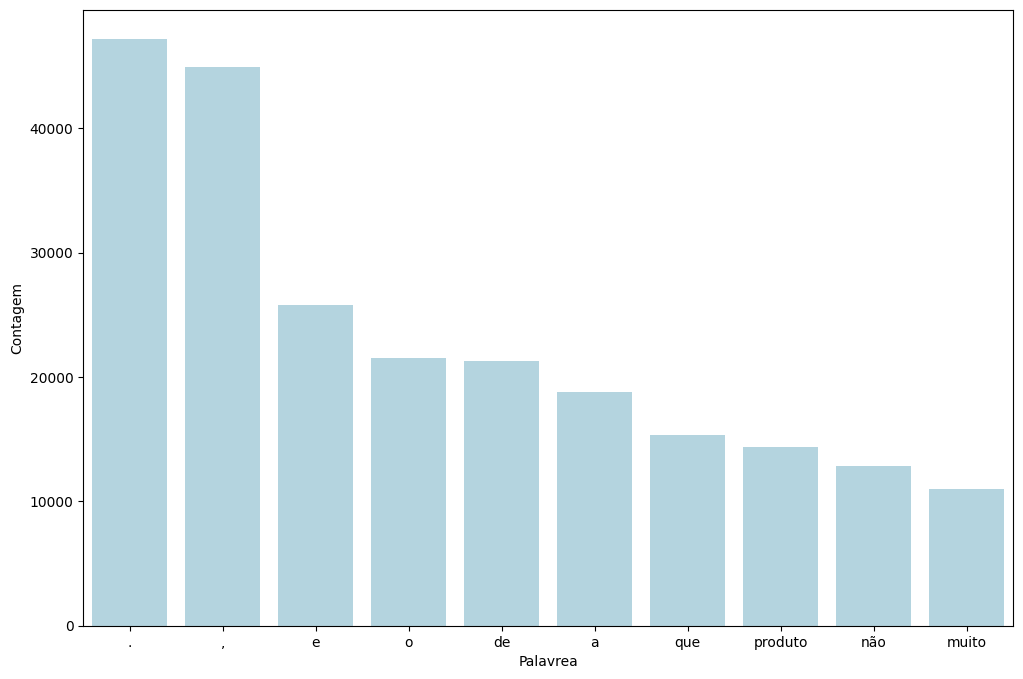

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 8))
ax = sns.barplot(x="Palavrea", y="Frequencia", data=dataframe_frequencia.nlargest(columns="Frequencia", n=10), color ="lightblue")

ax.set(ylabel = "Contagem")

In [ ]:
def grafico(dados, coluna_texto, quantidade):
  todas_palavras = ' '.join([texto for texto in dados[coluna_texto]])
  token_frase = token_por_espaco.tokenize(todas_palavras)
  frequencia = nltk.FreqDist(token_frase)
  dataframe_frequencia = pd.DataFrame({"Palavrea": list(frequencia.keys()), "Frequencia": list(frequencia.values())})

  dataframe_frequencia = dataframe_frequencia.nlargest(columns="Frequencia", n=quantidade)

  plt.figure(figsize=(12, 8))
  ax = sns.barplot(x="Palavrea", y="Frequencia", data= dataframe_frequencia , color ="lightblue")
  ax.set(ylabel = "Contagem")
  plt.show()

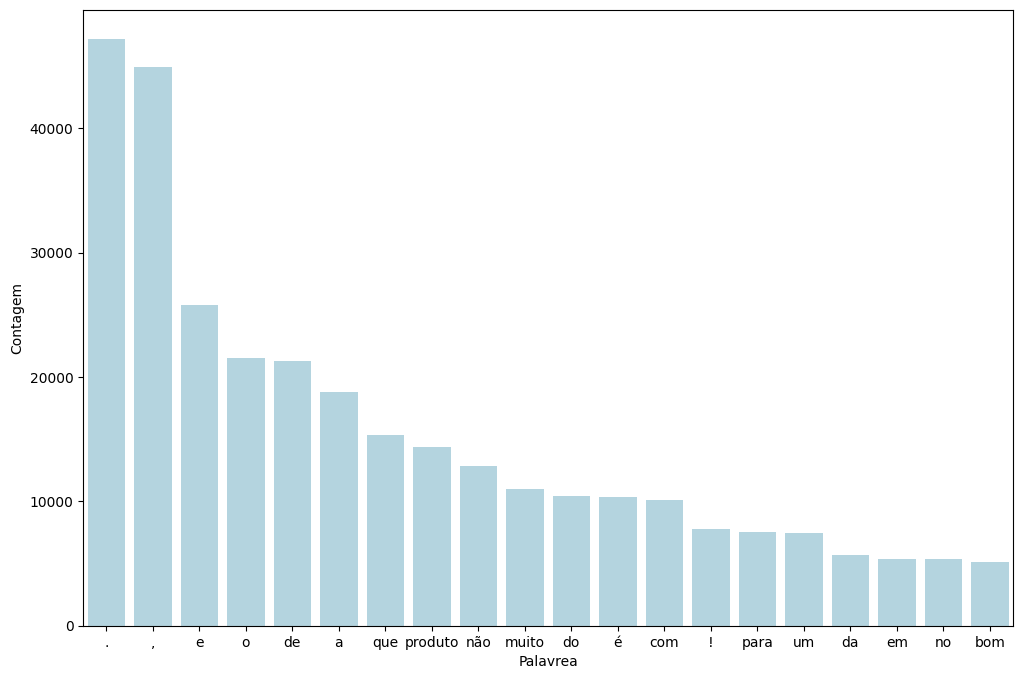

In [ ]:
grafico(avaliacoes, "review_text", 20)

# Remoção de Stop Words

In [ ]:
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")

In [ ]:
frase_processada = list()
for avaliacao in avaliacoes.review_text:
  nova_frase = list()
  palavras_texto = token_por_espaco.tokenize(avaliacao)
  for palavra in palavras_texto:
    if palavra not in palavras_irrelevantes:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))
avaliacoes["texto_sem_stopwords"] = frase_processada

In [ ]:
avaliacoes.head()

review_text  polarity  \
0  Bem macio e felpudo...recomendo.  Preço imbatí...       1.0   
1  Produto excepcional!  recomendo!!! inovador e ...       1.0   
2  recebi o produto antes do prazo mas veio com d...       0.0   
3  Bom custo beneficio. Adequado para pessoas que...       1.0   
5  ótmo produto atendeu as expectativas, a entreg...       1.0   

                                 texto_sem_stopwords  
0  Bem macio felpudo ... recomendo . Preço imbatí...  
1  Produto excepcional ! recomendo !!! inovador g...  
2  recebi produto antes prazo veio defeito trava ...  
3  Bom custo beneficio . Adequado pessoas fazem u...  
5  ótmo produto atendeu expectativas , entrega oc...

In [ ]:
treinar_modelo(avaliacoes, "texto_sem_stopwords", "polarity")

0.9327463927610663

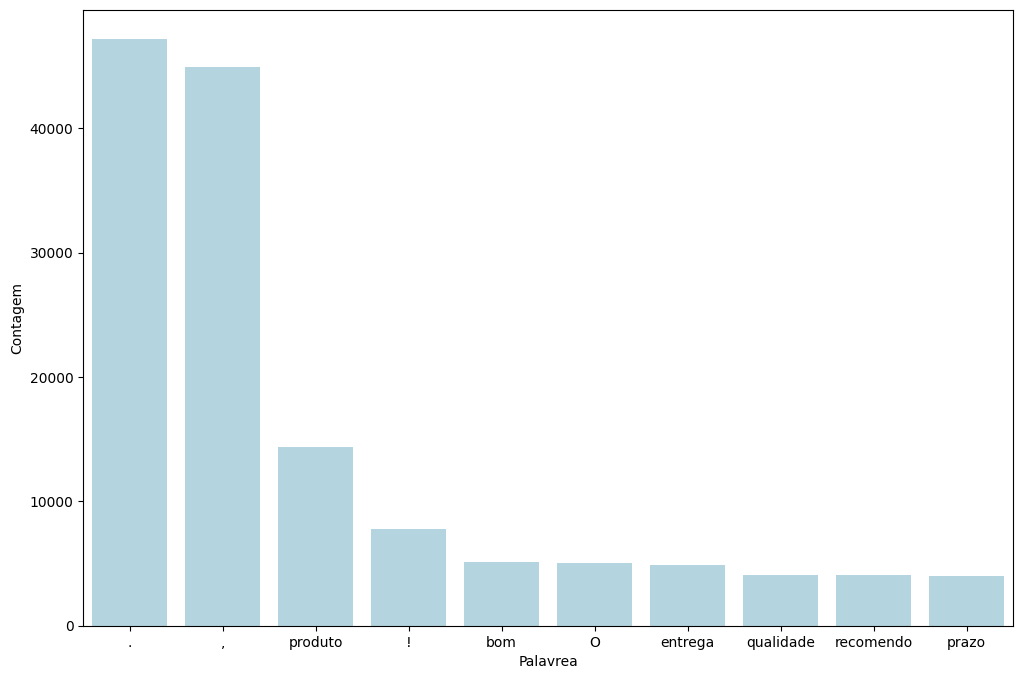

In [ ]:
grafico(avaliacoes, "texto_sem_stopwords", 10)

In [ ]:
from nltk import tokenize

frase = "Muito bom, esse produto"

token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)
token_frase

['Muito', 'bom', ',', 'esse', 'produto']

In [ ]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
pontuacao = list()
for ponto in punctuation:
  pontuacao.append(ponto)
pontuacao

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [ ]:
pontuacao_stopwords = pontuacao + palavras_irrelevantes

frase_processada = list()
for avaliacao in avaliacoes.texto_sem_stopwords:
  nova_frase = list()
  palavras_texto = token_pontuacao.tokenize(avaliacao)
  for palavra in palavras_texto:
    if palavra not in pontuacao_stopwords:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

avaliacoes["texto_sem_stopwords_e_pontuacao"] = frase_processada

In [ ]:
avaliacoes.head()

review_text  polarity  \
0  Bem macio e felpudo...recomendo.  Preço imbatí...       1.0   
1  Produto excepcional!  recomendo!!! inovador e ...       1.0   
2  recebi o produto antes do prazo mas veio com d...       0.0   
3  Bom custo beneficio. Adequado para pessoas que...       1.0   
5  ótmo produto atendeu as expectativas, a entreg...       1.0   

                                 texto_sem_stopwords  \
0  Bem macio felpudo ... recomendo . Preço imbatí...   
1  Produto excepcional ! recomendo !!! inovador g...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio . Adequado pessoas fazem u...   
5  ótmo produto atendeu expectativas , entrega oc...   

                     texto_sem_stopwords_e_pontuacao  
0  Bem macio felpudo ... recomendo Preço imbatíve...  
1  Produto excepcional recomendo !!! inovador gos...  
2  recebi produto antes prazo veio defeito trava ...  
3  Bom custo beneficio Adequado pessoas fazem uso...  
5  ótmo produto atendeu expectativas entrega ocor...

In [ ]:
avaliacoes.texto_sem_stopwords[5]

'ótmo produto atendeu expectativas , entrega ocorreu antes previsto . bom'

In [ ]:
avaliacoes.texto_sem_stopwords_e_pontuacao[5]

'ótmo produto atendeu expectativas entrega ocorreu antes previsto bom'

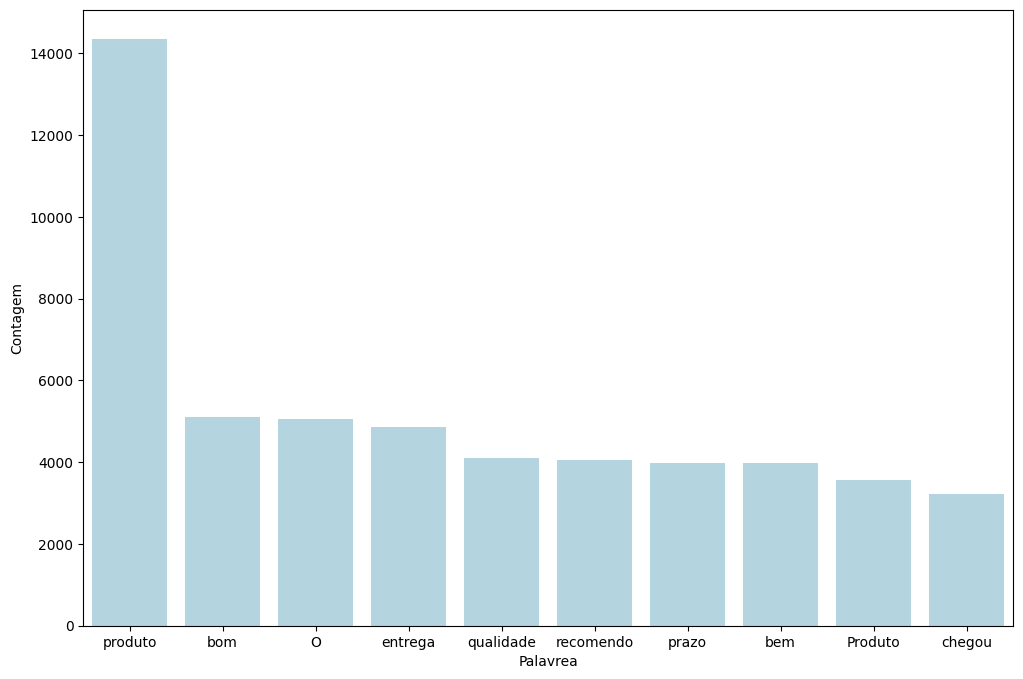

In [ ]:
grafico(avaliacoes, "texto_sem_stopwords_e_pontuacao", 10)

In [ ]:
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 3.9 MB/s eta 0:00:00


In [ ]:
import unidecode

acentos = "ótimo péssimo não tão é"

teste = unidecode.unidecode(acentos)
teste

'otimo pessimo nao tao e'

In [ ]:
sem_acentos = [unidecode.unidecode(texto) for texto in avaliacoes.texto_sem_stopwords_e_pontuacao]

In [ ]:
sem_acentos[4]

'otmo produto atendeu expectativas entrega ocorreu antes previsto bom'

In [ ]:
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]
stopwords_sem_acento

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 'a',
 'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'as',
 'ate',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'eramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'esta',
 'estamos',
 'estao',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estavamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiveramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivessemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'foramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fossemos',
 'fui',
 'ha',
 'haja

In [ ]:
avaliacoes["texto_sem_stopwords_e_pontuacao_sem_acento"] = sem_acentos

frase_processada = list()
for avaliacao in avaliacoes.texto_sem_stopwords_e_pontuacao_sem_acento:
  nova_frase = list()
  palavras_texto = token_pontuacao.tokenize(avaliacao)
  for palavra in palavras_texto:
    if palavra not in stopwords_sem_acento:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

avaliacoes["texto_sem_stopwords_e_pontuacao_sem_acento"] = frase_processada

In [ ]:
avaliacoes.head()

review_text  polarity  \
0  Bem macio e felpudo...recomendo.  Preço imbatí...       1.0   
1  Produto excepcional!  recomendo!!! inovador e ...       1.0   
2  recebi o produto antes do prazo mas veio com d...       0.0   
3  Bom custo beneficio. Adequado para pessoas que...       1.0   
5  ótmo produto atendeu as expectativas, a entreg...       1.0   

                                 texto_sem_stopwords  \
0  Bem macio felpudo ... recomendo . Preço imbatí...   
1  Produto excepcional ! recomendo !!! inovador g...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio . Adequado pessoas fazem u...   
5  ótmo produto atendeu expectativas , entrega oc...   

                     texto_sem_stopwords_e_pontuacao  \
0  Bem macio felpudo ... recomendo Preço imbatíve...   
1  Produto excepcional recomendo !!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio Adequado pessoas fazem uso...   
5  ótmo produto atendeu expectativas entrega ocor...   

          texto_sem_stopwords_e_pontuacao_sem_acento  
0  Bem macio felpudo ... recomendo Preco imbative...  
1  Produto excepcional recomendo !!! inovador gos...  
2  recebi produto antes prazo veio defeito trava ...  
3  Bom custo beneficio Adequado pessoas fazem uso...  
5  otmo produto atendeu expectativas entrega ocor...

In [ ]:
treinar_modelo(avaliacoes, "texto_sem_stopwords_e_pontuacao_sem_acento", "polarity")

0.9320127170457324

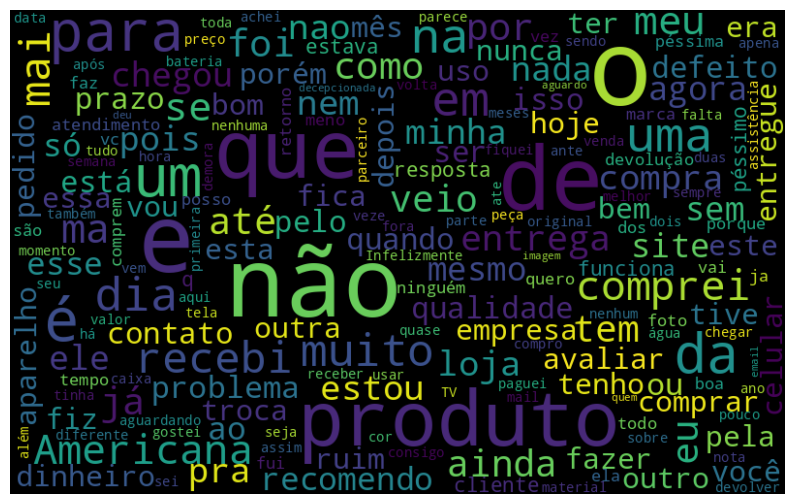

In [ ]:
word_cloud_neg(avaliacoes, "texto_sem_stopwords_e_pontuacao_sem_acento")

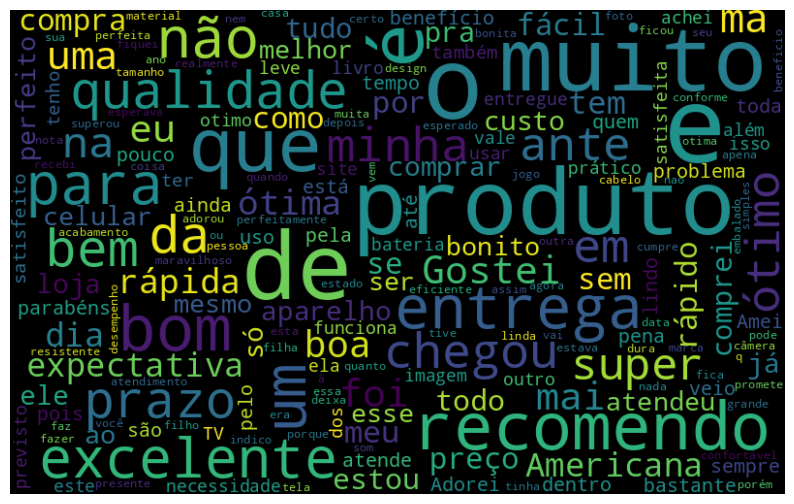

In [ ]:
word_cloud_pos(avaliacoes, "texto_sem_stopwords_e_pontuacao_sem_acento")

In [ ]:
frase = " O Rato Roeu a Roupa do Rei de  Roma"
print(frase.lower())

 o rato roeu a roupa do rei de  roma


In [ ]:
frase_processada = list()
for avaliacao in avaliacoes.texto_sem_stopwords_e_pontuacao_sem_acento:
  nova_frase = list()
  avaliacao = avaliacao.lower()
  palavras_texto = token_pontuacao.tokenize(avaliacao)
  for palavra in palavras_texto:
    if palavra not in stopwords_sem_acento:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

avaliacoes["texto_sem_stopwords_e_pontuacao_sem_acento_minusculo"] = frase_processada

In [ ]:
avaliacoes.head()

review_text  polarity  \
0  Bem macio e felpudo...recomendo.  Preço imbatí...       1.0   
1  Produto excepcional!  recomendo!!! inovador e ...       1.0   
2  recebi o produto antes do prazo mas veio com d...       0.0   
3  Bom custo beneficio. Adequado para pessoas que...       1.0   
5  ótmo produto atendeu as expectativas, a entreg...       1.0   

                                 texto_sem_stopwords  \
0  Bem macio felpudo ... recomendo . Preço imbatí...   
1  Produto excepcional ! recomendo !!! inovador g...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio . Adequado pessoas fazem u...   
5  ótmo produto atendeu expectativas , entrega oc...   

                     texto_sem_stopwords_e_pontuacao  \
0  Bem macio felpudo ... recomendo Preço imbatíve...   
1  Produto excepcional recomendo !!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio Adequado pessoas fazem uso...   
5  ótmo produto atendeu expectativas entrega ocor...   

          texto_sem_stopwords_e_pontuacao_sem_acento  \
0  Bem macio felpudo ... recomendo Preco imbative...   
1  Produto excepcional recomendo !!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio Adequado pessoas fazem uso...   
5  otmo produto atendeu expectativas entrega ocor...   

  texto_sem_stopwords_e_pontuacao_sem_acento_minusculo  
0  bem macio felpudo ... recomendo preco imbative...    
1  produto excepcional recomendo !!! inovador gos...    
2  recebi produto antes prazo veio defeito trava ...    
3  bom custo beneficio adequado pessoas fazem uso...    
5  otmo produto atendeu expectativas entrega ocor...

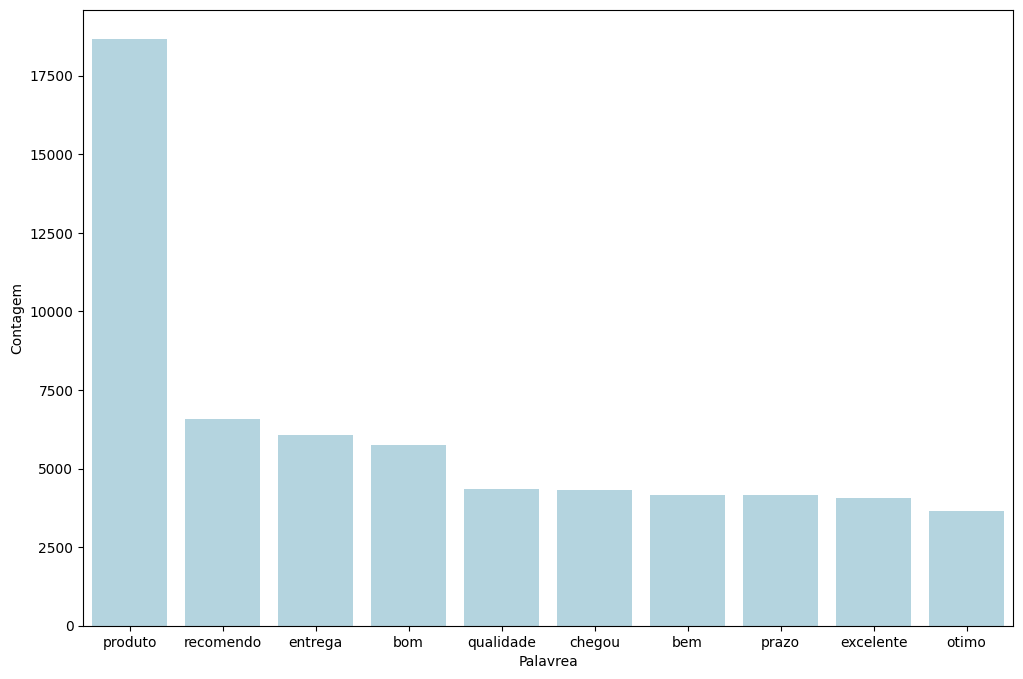

In [ ]:
grafico(avaliacoes, "texto_sem_stopwords_e_pontuacao_sem_acento_minusculo", 10)

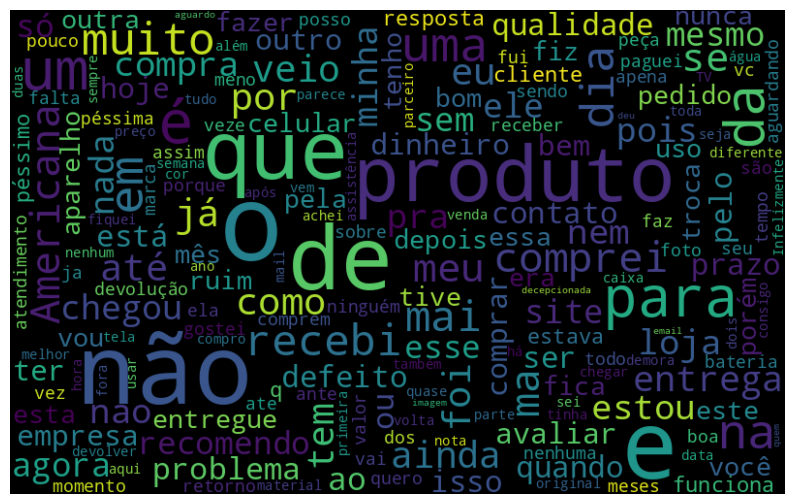

In [ ]:
word_cloud_neg(avaliacoes, "texto_sem_stopwords_e_pontuacao_sem_acento_minusculo")

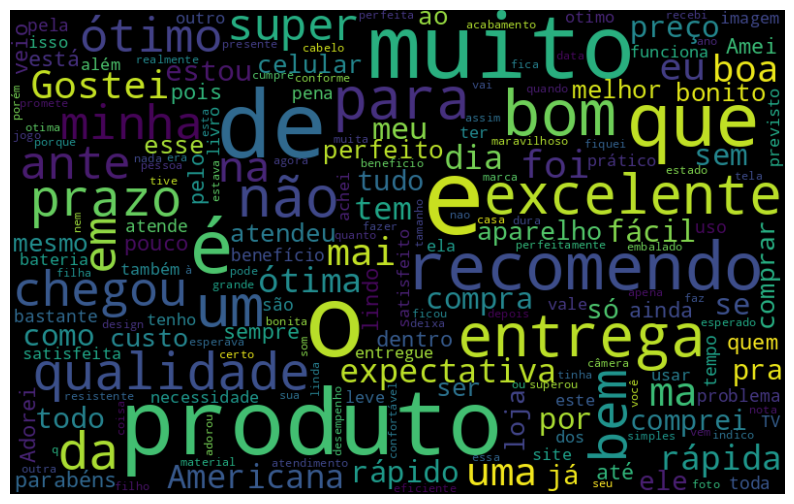

In [ ]:
word_cloud_pos(avaliacoes, "texto_sem_stopwords_e_pontuacao_sem_acento_minusculo")

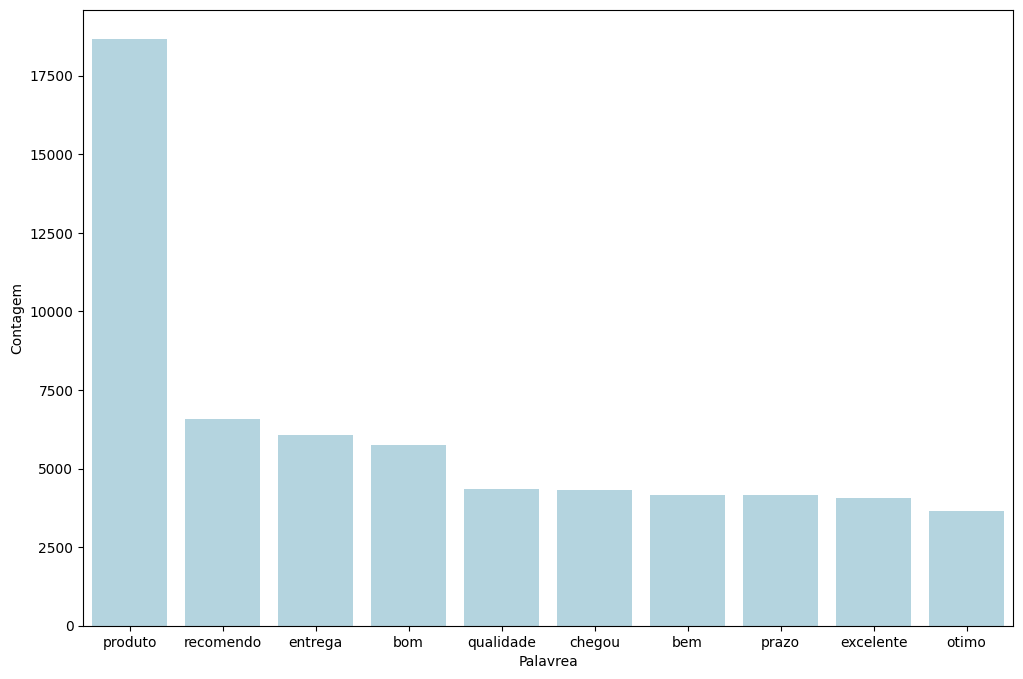

In [ ]:
grafico(avaliacoes, "texto_sem_stopwords_e_pontuacao_sem_acento_minusculo", 10)

# Stemming RSLP

In [ ]:
stemmer = nltk.RSLPStemmer()
stemmer.stem("correndo")
stemmer.stem("corredor")
stemmer.stem("corrida")
stemmer.stem("correr")

'corr'

In [ ]:
avaliacoes.head()

review_text  polarity  \
0  Bem macio e felpudo...recomendo.  Preço imbatí...       1.0   
1  Produto excepcional!  recomendo!!! inovador e ...       1.0   
2  recebi o produto antes do prazo mas veio com d...       0.0   
3  Bom custo beneficio. Adequado para pessoas que...       1.0   
5  ótmo produto atendeu as expectativas, a entreg...       1.0   

                                 texto_sem_stopwords  \
0  Bem macio felpudo ... recomendo . Preço imbatí...   
1  Produto excepcional ! recomendo !!! inovador g...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio . Adequado pessoas fazem u...   
5  ótmo produto atendeu expectativas , entrega oc...   

                     texto_sem_stopwords_e_pontuacao  \
0  Bem macio felpudo ... recomendo Preço imbatíve...   
1  Produto excepcional recomendo !!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio Adequado pessoas fazem uso...   
5  ótmo produto atendeu expectativas entrega ocor...   

          texto_sem_stopwords_e_pontuacao_sem_acento  \
0  Bem macio felpudo ... recomendo Preco imbative...   
1  Produto excepcional recomendo !!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio Adequado pessoas fazem uso...   
5  otmo produto atendeu expectativas entrega ocor...   

  texto_sem_stopwords_e_pontuacao_sem_acento_minusculo  
0  bem macio felpudo ... recomendo preco imbative...    
1  produto excepcional recomendo !!! inovador gos...    
2  recebi produto antes prazo veio defeito trava ...    
3  bom custo beneficio adequado pessoas fazem uso...    
5  otmo produto atendeu expectativas entrega ocor...

In [ ]:
frase_processada = list()
for avaliacao in avaliacoes.texto_sem_stopwords_e_pontuacao_sem_acento_minusculo:
  nova_frase = list()
  palavras_texto = token_pontuacao.tokenize(avaliacao)
  for palavra in palavras_texto:
    if palavra not in stopwords_sem_acento:
      nova_frase.append(stemmer.stem(palavra))
  frase_processada.append(' '.join(nova_frase))

avaliacoes["texto_stemmizado"] = frase_processada

In [ ]:
avaliacoes.head()

review_text  polarity  \
0  Bem macio e felpudo...recomendo.  Preço imbatí...       1.0   
1  Produto excepcional!  recomendo!!! inovador e ...       1.0   
2  recebi o produto antes do prazo mas veio com d...       0.0   
3  Bom custo beneficio. Adequado para pessoas que...       1.0   
5  ótmo produto atendeu as expectativas, a entreg...       1.0   

                                 texto_sem_stopwords  \
0  Bem macio felpudo ... recomendo . Preço imbatí...   
1  Produto excepcional ! recomendo !!! inovador g...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio . Adequado pessoas fazem u...   
5  ótmo produto atendeu expectativas , entrega oc...   

                     texto_sem_stopwords_e_pontuacao  \
0  Bem macio felpudo ... recomendo Preço imbatíve...   
1  Produto excepcional recomendo !!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio Adequado pessoas fazem uso...   
5  ótmo produto atendeu expectativas entrega ocor...   

          texto_sem_stopwords_e_pontuacao_sem_acento  \
0  Bem macio felpudo ... recomendo Preco imbative...   
1  Produto excepcional recomendo !!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio Adequado pessoas fazem uso...   
5  otmo produto atendeu expectativas entrega ocor...   

  texto_sem_stopwords_e_pontuacao_sem_acento_minusculo  \
0  bem macio felpudo ... recomendo preco imbative...     
1  produto excepcional recomendo !!! inovador gos...     
2  recebi produto antes prazo veio defeito trava ...     
3  bom custo beneficio adequado pessoas fazem uso...     
5  otmo produto atendeu expectativas entrega ocor...     

                                    texto_stemmizado  
0  bem maci felpud ... recom prec imbati entreg r...  
1           produt excepc recom !!! inov gost ler !!  
2  receb produt ant praz vei defeit tr us agor am...  
3  bom cust benefici adequ pesso faz uso cas apar...  
5  otm produt atend expect entreg ocorr ant previ...

In [ ]:
treinar_modelo(avaliacoes,"texto_sem_stopwords_e_pontuacao_sem_acento_minusculo","polarity")

0.9278552213255075

In [ ]:
treinar_modelo(avaliacoes,"texto_stemmizado","polarity")

0.9265101491807288

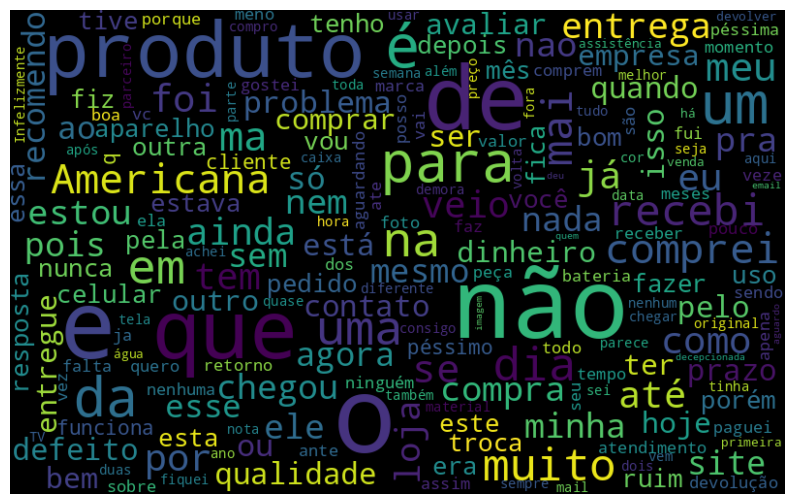

In [ ]:
word_cloud_neg(avaliacoes, "texto_stemmizado")

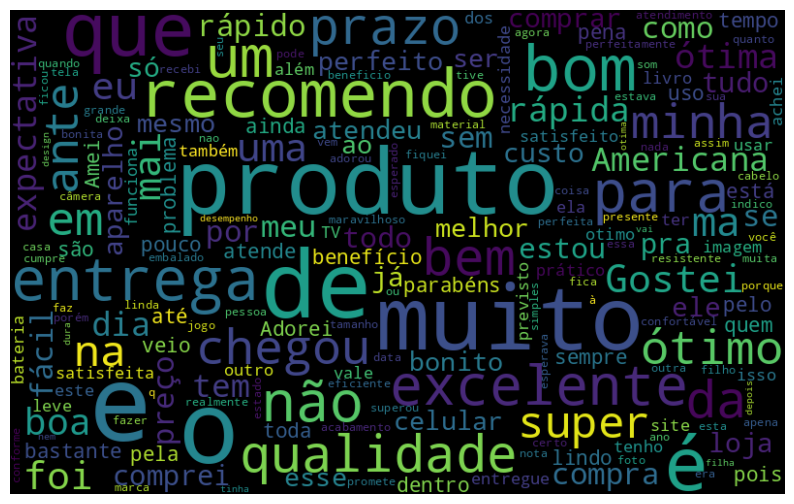

In [ ]:
word_cloud_pos(avaliacoes, "texto_stemmizado")

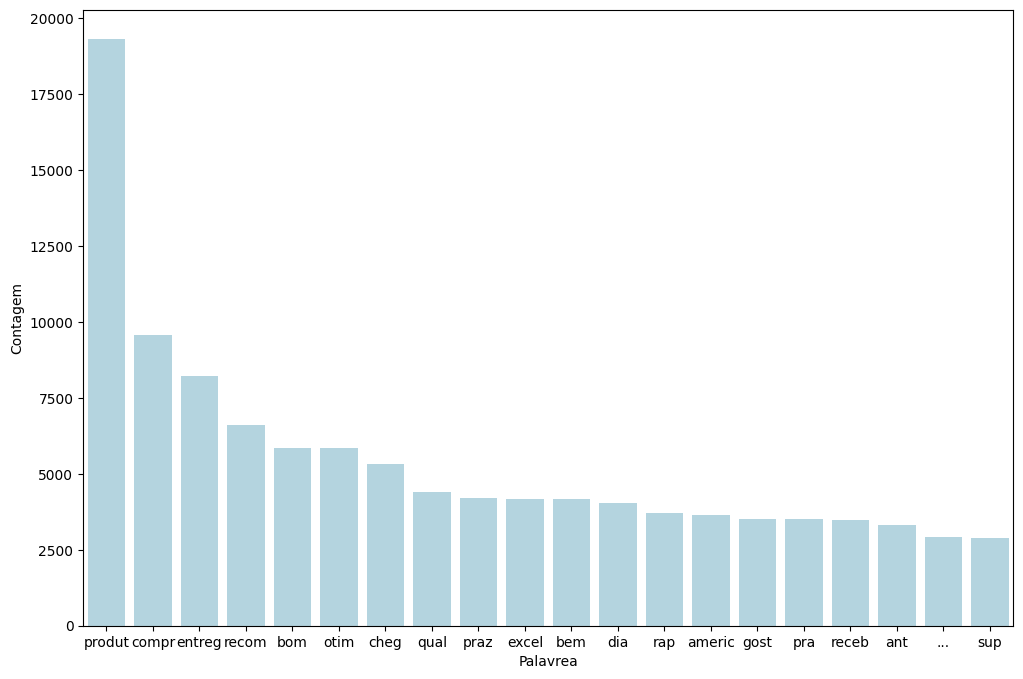

In [ ]:
grafico(avaliacoes, "texto_stemmizado", 20)

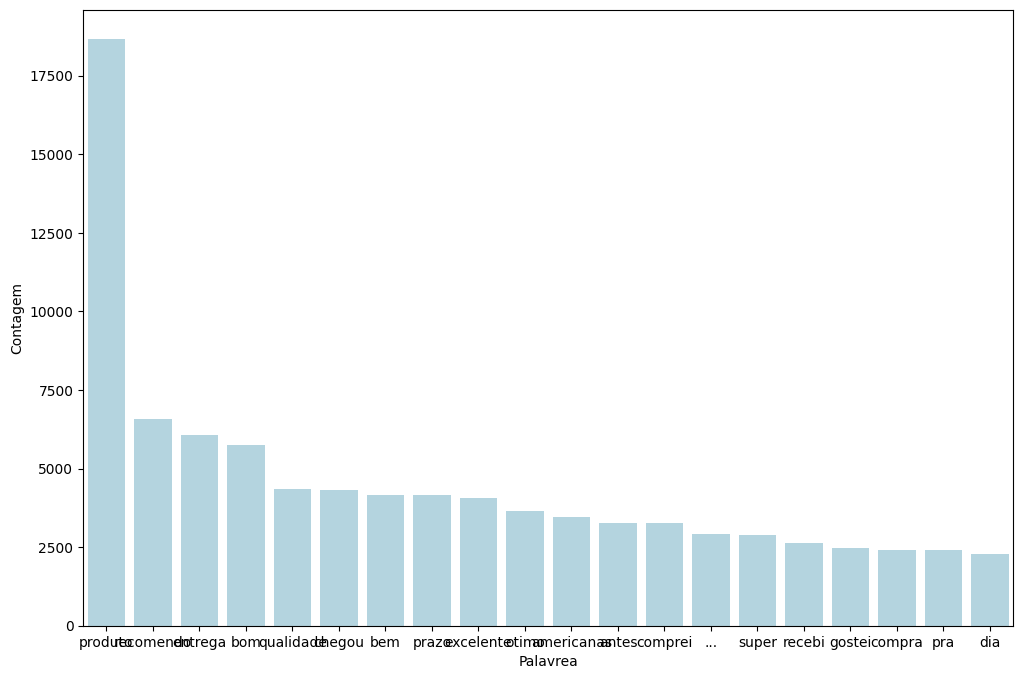

In [ ]:
grafico(avaliacoes, "texto_sem_stopwords_e_pontuacao_sem_acento_minusculo", 20)

# TF IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

frases = ["Este produto é muito bom", "Este produto é muito ruim"]
tfidf = TfidfVectorizer(lowercase= False, max_features=100)
caracteristicas = tfidf.fit_transform(frases)

pd.DataFrame(caracteristicas.todense(),
             columns = tfidf.get_feature_names_out())


Este       bom     muito   produto      ruim
0  0.448321  0.630099  0.448321  0.448321  0.000000
1  0.448321  0.000000  0.448321  0.448321  0.630099

In [ ]:
tfidf_tratados = tfidf.fit_transform(avaliacoes.texto_stemmizado)

treino, teste, classe_treino, classe_teste = train_test_split(tfidf_tratados, avaliacoes.polarity, stratify= avaliacoes.polarity, random_state=71)

regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino,classe_treino)
acuracia_idf = regressao_logistica.score(teste,classe_teste)
acuracia_idf

0.8894595255563708

# NGrams

In [ ]:
from nltk import ngrams

frase = "Comprei um ótimo produto"
frase_separada = token_por_espaco.tokenize(frase)
pares = ngrams(frase_separada, 2)
list(pares)

[('Comprei', 'um'), ('um', 'ótimo'), ('ótimo', 'produto')]

In [ ]:
tdidf = TfidfVectorizer(lowercase=False)
vetor_tfidf = tfidf.fit_transform(avaliacoes.texto_stemmizado)

treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf, avaliacoes.polarity, random_state=71)

regressao_logistica =  LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia_ngrams = regressao_logistica.score(teste, classe_teste)
acuracia_ngrams

0.8866471019809244

In [ ]:
tdidf = TfidfVectorizer(lowercase=False, ngram_range=(1,2))
vetor_tfidf = tfidf.fit_transform(avaliacoes.texto_stemmizado)

treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf, avaliacoes.polarity, random_state=71)

regressao_logistica =  LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia_ngrams = regressao_logistica.score(teste, classe_teste)
acuracia_ngrams

0.8866471019809244

In [ ]:
pesos = pd.DataFrame(
    regressao_logistica.coef_[0].T,
    index = tfidf.get_feature_names_out()
)

pesos.nlargest(10, 0)

0
otim       8.153490
excel      8.041040
ador       5.695683
perfeit    5.272973
satisfeit  4.870071
bom        4.710336
parab      4.268621
lind       4.106516
rap        3.705868
sup        3.166655

In [ ]:
pesos.nsmallest(10, 0)

0
pess   -5.216399
defeit -3.315947
receb  -3.126075
contat -2.638751
troc   -2.202549
vei    -2.167245
hoj    -2.018940
avali  -1.972494
ped    -1.898275
nad    -1.897669

In [ ]:
pesos.nlargest(100, 0)

0
otim       8.153490
excel      8.041040
ador       5.695683
perfeit    5.272973
satisfeit  4.870071
...             ...
troc      -2.202549
contat    -2.638751
receb     -3.126075
defeit    -3.315947
pess      -5.216399

[100 rows x 1 columns]

In [ ]:
pesos.nsmallest(100, 0)

0
pess      -5.216399
defeit    -3.315947
receb     -3.126075
contat    -2.638751
troc      -2.202549
...             ...
satisfeit  4.870071
perfeit    5.272973
ador       5.695683
excel      8.041040
otim       8.153490

[100 rows x 1 columns]